In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Plot examples

In [2]:
from astra import Astra, run_astra_with_distgen
from astra.plot import plot_fieldmaps, plot_stats, plot_stats_with_layout

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16,4)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os

In [3]:
# Input template file 
ASTRA_IN = 'templates/dcgun/astra.in'

# Make an Astra object
A = Astra(input_file=ASTRA_IN)

# Fieldmap plot from A.input

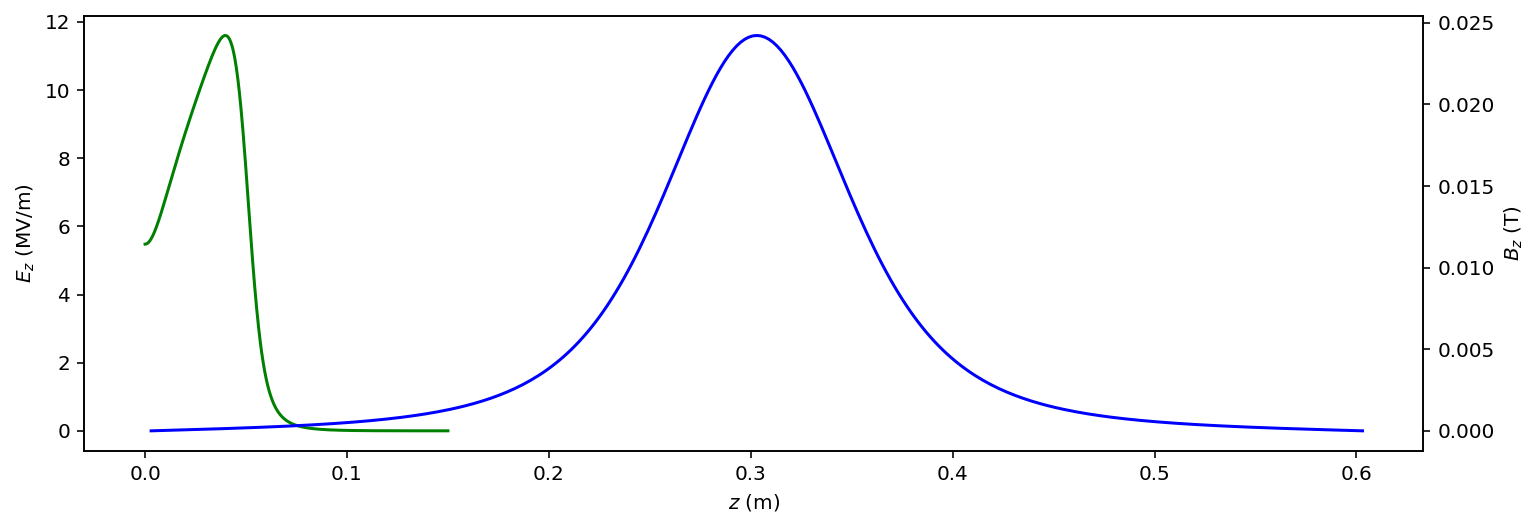

In [4]:
A.plot_fieldmaps()

# Stat plots from completed run

In [5]:
# Run Astra with Distgen
DISTGEN_IN = 'templates/dcgun/distgen.yaml'


settings = {'zstop':1, 'zemit':200, 'zphase':1, 'phases':True}
settings['distgen:n_particle'] = 2000

A2 = run_astra_with_distgen(settings=settings, astra_input_file=ASTRA_IN,
                              distgen_input_file=DISTGEN_IN)

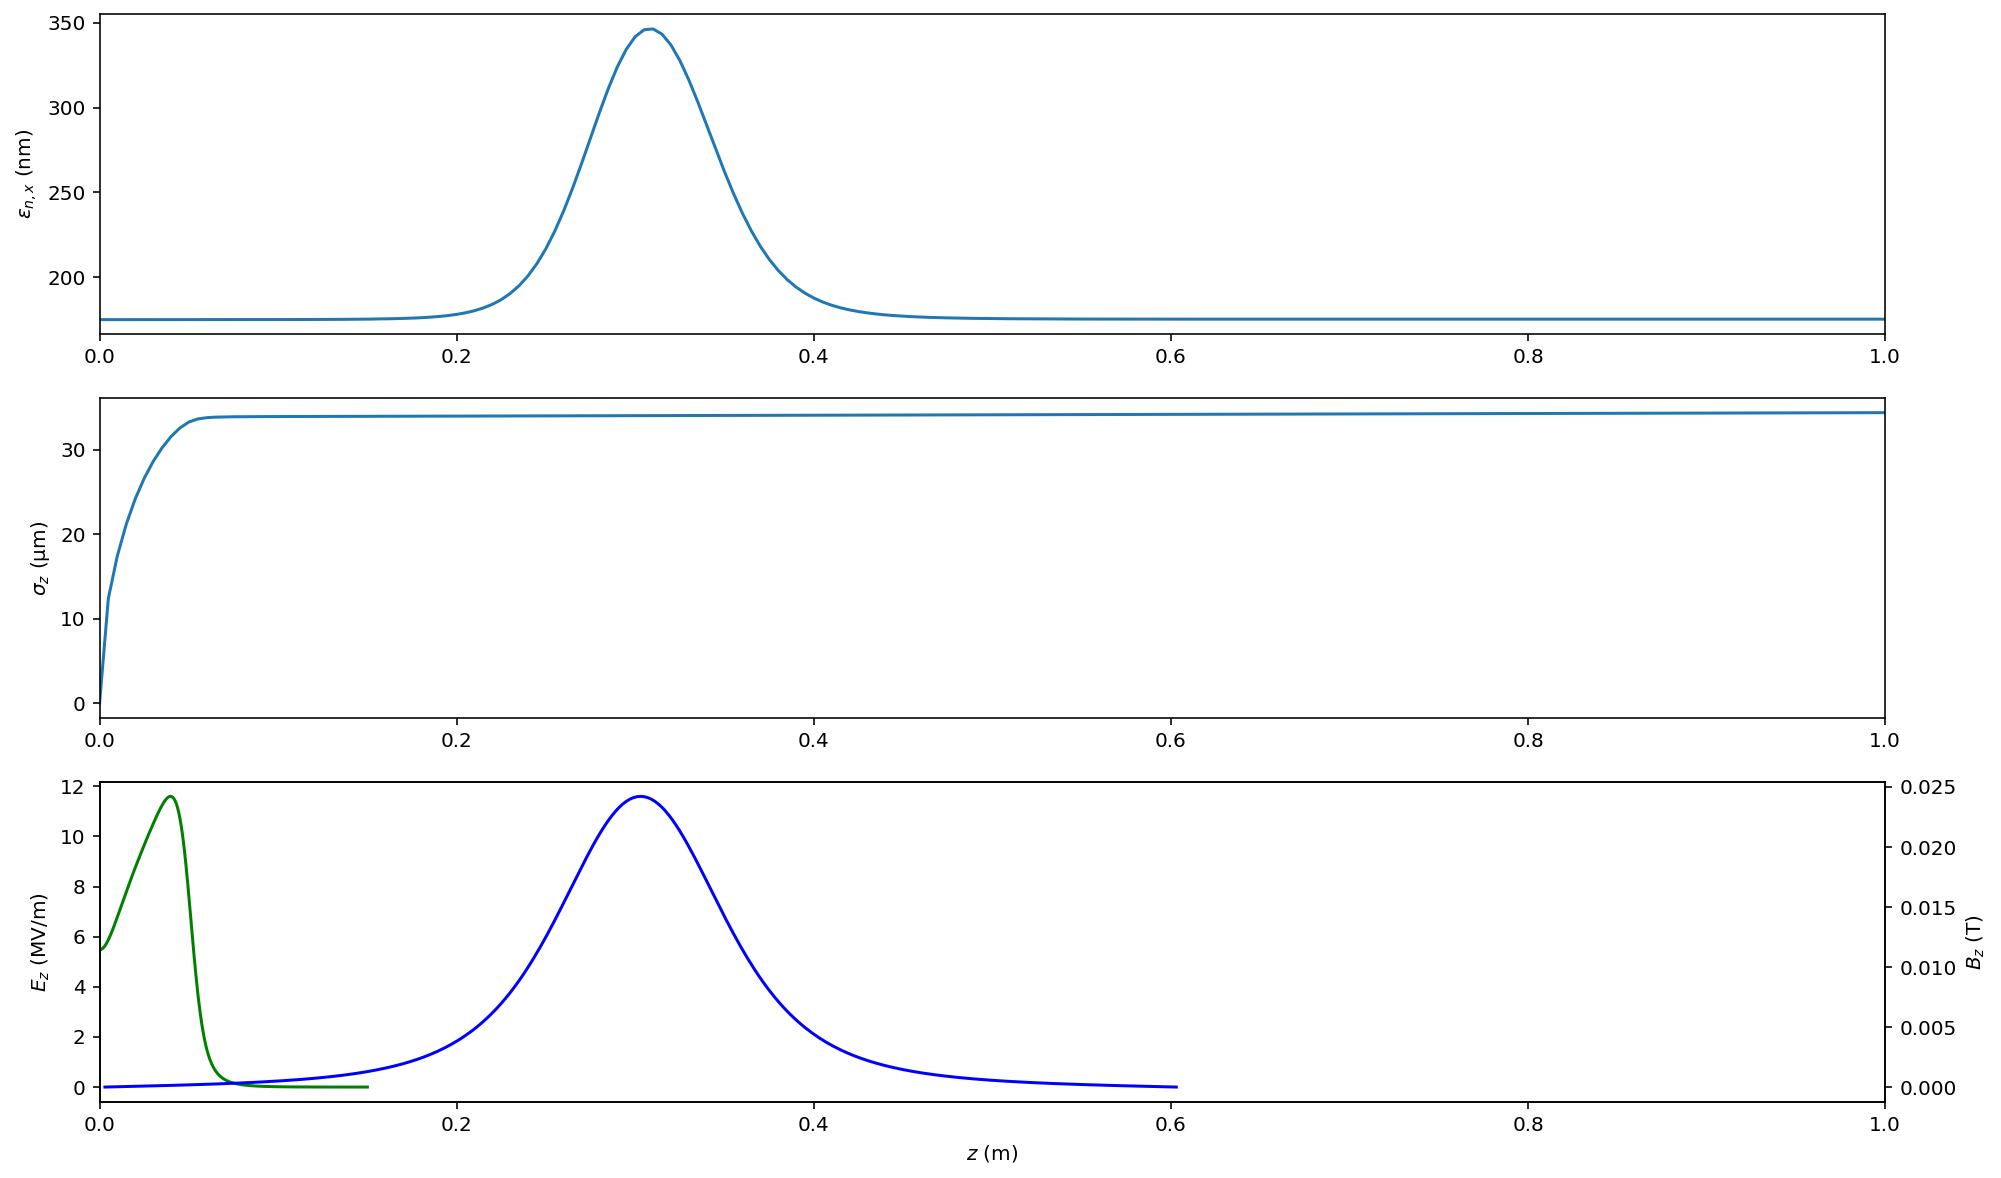

In [6]:
matplotlib.rcParams['figure.figsize'] = (16,10)
# Modify limits
plot_stats(A2)

# Compact summary plot

In [7]:
?plot_stats_with_layout

Signature:
plot_stats_with_layout(
    astra_object,
    ykeys=['sigma_x', 'sigma_y'],
    ykeys2=['sigma_z'],
    xkey='mean_z',
    xlim=None,
    ylim=None,
    ylim2=None,
    nice=True,
    tex=True,
    include_layout=False,
    include_labels=True,
    include_particles=True,
    include_legend=True,
    return_figure=False,
    **kwargs,
)
Docstring:
Plots stat output multiple keys.

If a list of ykeys2 is given, these will be put on the right hand axis. This can also be given as a single key. 

Logical switches:
    nice: a nice SI prefix and scaling will be used to make the numbers reasonably sized. Default: True
    
    tex: use mathtext (TeX) for plot labels. Default: True
    
    include_legend: The plot will include the legend.  Default: True
    
    include_particles: Plot the particle statistics as dots. Default: True
    
    include_layout: the layout plot will be displayed at the bottom.  Default: True
    
    include_labels: the layout will include element label

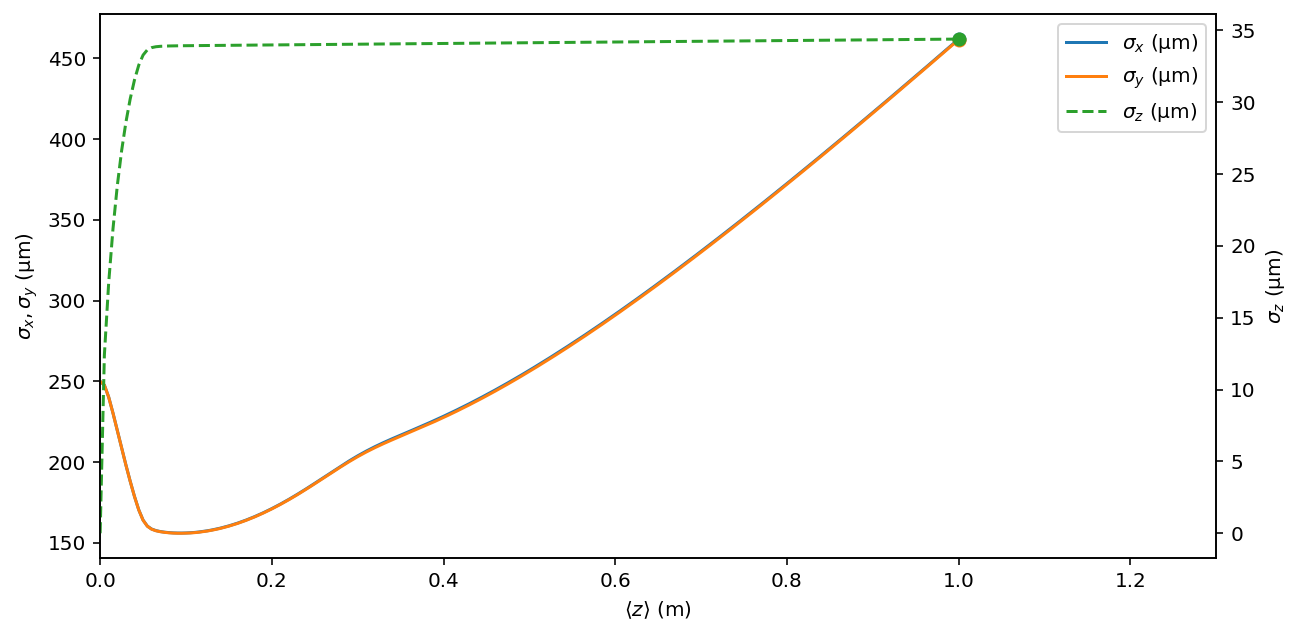

In [8]:
kwargs = {'figsize':(10,5)}

plot_stats_with_layout(A2, ykeys=['sigma_x', 'sigma_y'], ykeys2=['sigma_z'], 
                           xkey='mean_z', xlim=(0, 1.3), 
                           nice=True, 
                           include_layout=False,
                           include_labels=True, 
                           include_particles=True, 
                           include_legend=True, **kwargs)

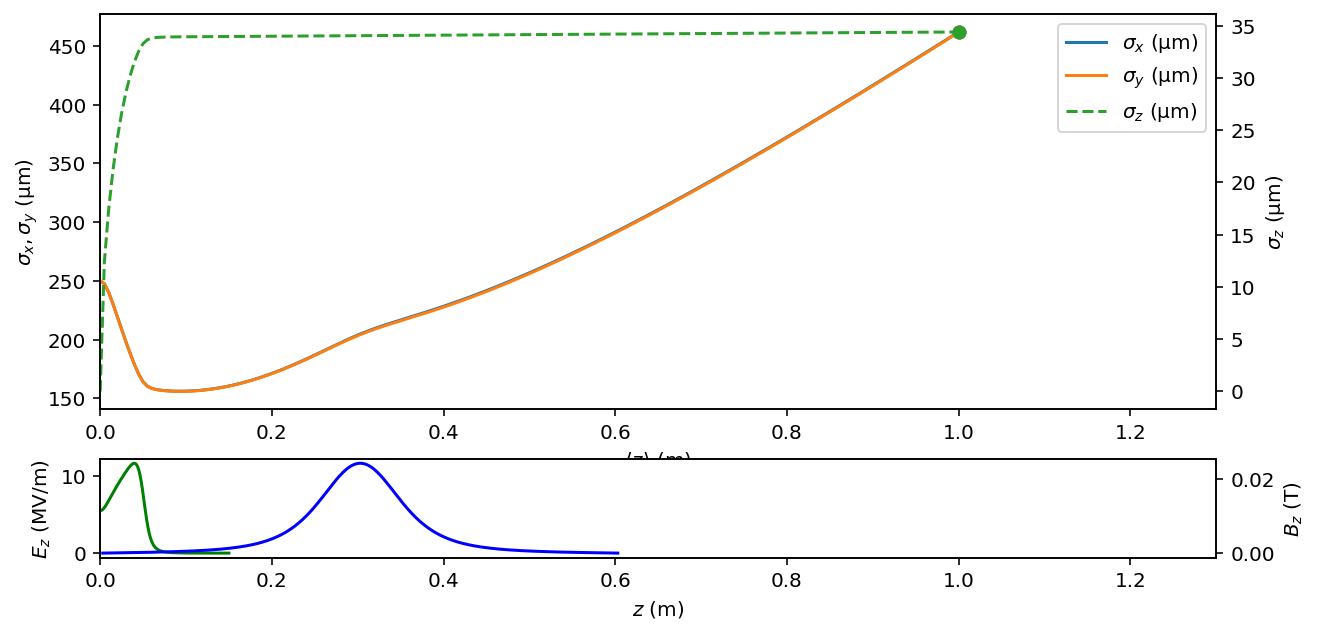

In [9]:
# The convenience plottings slightly changes the keys
A2.plot( y=['sigma_x', 'sigma_y'], y2=['sigma_z'], x='mean_z', xlim=(0,1.3), figsize=(10,5))